In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
%load_ext autoreload

%autoreload 2
import fancyimpute as ft
import seaborn as sns
import missingno as mn

Using TensorFlow backend.


##### Reading GCP Files

In [3]:
import glob
import codecs
lincs_p100 = {}
for f in glob.glob('*.gct'):
    a = f.split('_annotated')
    name = str(a[0])
    reading_file =  doc1 = codecs.open(f,'UTF-16') #open for reading with "universal" type set
    lincs_p100[name] = pd.read_csv(reading_file, sep='\t', skiprows=2)

###### Assign column header as name drugs 

In [4]:
for f in lincs_p100.keys():
#     print f
    header_index = (lincs_p100[f].index[lincs_p100[f]['id'] =='pert_iname'])[0]
#     print header_index
    lincs_p100[f].columns = lincs_p100[f].iloc[header_index]

In [5]:
lincs_p100[ lincs_p100.keys()[0]]

12,pert_iname,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,Pravastatin,vorinostat,vorinostat,vorinostat,BYL719,BYL719,BYL719,PS-1145,PS-1145,PS-1145
0,cell_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NPC,NPC,NPC,NPC,NPC,NPC,NPC,NPC,NPC,NPC
1,det_filename,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C20151102_NPC_T3-cmpds_P-0027_H03_acq_02,C20151102_NPC_T3-cmpds_P-0027_H04_acq_02,C20151102_NPC_T3-cmpds_P-0027_H05_acq_02,C20151102_NPC_T3-cmpds_P-0027_H06_acq_02,C20151106_NPC_T3-cmpds_P-0027_H07_acq_03,C20151106_NPC_T3-cmpds_P-0027_H08_acq_03,C20151106_NPC_T3-cmpds_P-0027_H09_acq_03,C20151106_NPC_T3-cmpds_P-0027_H10_acq_03,C20151106_NPC_T3-cmpds_P-0027_H11_acq_03,C20151106_NPC_T3-cmpds_P-0027_H12_acq_03
2,det_normalization_group_vector,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1,1,1,1,1,1,1,1
3,det_plate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,P-0027,P-0027,P-0027,P-0027,P-0027,P-0027,P-0027,P-0027,P-0027,P-0027
4,det_well,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
5,isomeric_smiles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CC[C@H](C)C(=O)O[C@H]1C[C@@H](C=C2[C@H]1[C@H](...,C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO,C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO,C1=CC=C(C=C1)NC(=O)CCCCCCC(=O)NO,CC1=C(SC(=N1)NC(=O)N2CCC[C@H]2C(=O)N)C3=CC(=NC...,CC1=C(SC(=N1)NC(=O)N2CCC[C@H]2C(=O)N)C3=CC(=NC...,CC1=C(SC(=N1)NC(=O)N2CCC[C@H]2C(=O)N)C3=CC(=NC...,C1=CC(=CN=C1)C(=O)NC2=C3C(=CC(=C2)Cl)C4=C(N3)C...,C1=CC(=CN=C1)C(=O)NC2=C3C(=CC(=C2)Cl)C4=C(N3)C...,C1=CC(=CN=C1)C(=O)NC2=C3C(=CC(=C2)Cl)C4=C(N3)C...
6,lsm_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,LSM-3347,LSM-3828,LSM-3828,LSM-3828,LSM-4256,LSM-4256,LSM-4256,LSM-5975,LSM-5975,LSM-5975
7,pert_batch_internal_compound_enumerator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,16,16,16,24,24,24,32,32,32
8,pert_batch_internal_replicate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,1,2,3,1,2,3,1,2,3
9,pert_dose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,1,1,1,0.25,0.25,0.25,10,10,10


In [218]:
print lincs_p100[lincs_p100.keys()[0]].iloc[4].tolist()


['det_well', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'B12', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G12', 'H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8', 'H9', 'H10', 'H11', 'H12']


##### Deleting columns with nan headers
**Delete unwanted rows**
**create hierarchical indexing**, It will be euseful to select replicates

In [6]:
keys = lincs_p100.keys()
for f in keys:
    lincs_p100[f].columns = lincs_p100[f].columns.fillna('to_drop')
    
    #Fill nan to to_prop, in next step drop these columns     
    lincs_p100[f].drop('to_drop', axis = 1, inplace = True)
    rowstoremove       = lincs_p100[f]['pert_iname'].tolist()
    first_header_index = rowstoremove.index('det_well')
    first_header = lincs_p100[f].iloc[first_header_index].tolist()
    remove_rows_until_this_index = rowstoremove.index('10011_DYRK_Y321_IYQY[+80]IQSR')
    lincs_p100[f] = lincs_p100[f][remove_rows_until_this_index:]
    print f,remove_rows_until_this_index

#     i = 0
#     drug = lincs_p100[f].columns[1:][0]
#     header_list = ['Drugs_plate']
#     for col in lincs_p100[f].columns[1:]:

#         if (drug==col):
#             i=i+1
        
#         else:
#             i = 1
#             drug = col
#         header_list.append(col+'_'+str(i))
    tups = zip(first_header,lincs_p100[f].columns)
    lincs_p100[f].columns = pd.MultiIndex.from_tuples(tups)


    

LINCS_P100_DIA_Plate27 19
LINCS_P100_DIA_Plate61 20
LINCS_P100_DIA_Plate60 21
LINCS_P100_DIA_Plate48 21
LINCS_P100_DIA_Plate47 21
LINCS_P100_DIA_Plate46 20
LINCS_P100_DIA_Plate23 19
LINCS_P100_DIA_Plate44 21
LINCS_P100_DIA_Plate43 20
LINCS_P100_DIA_Plate24 19
LINCS_P100_DIA_Plate41 21
LINCS_P100_DIA_Plate40 27
LINCS_P100_DIA_Plate15 19
LINCS_P100_DIA_Plate16 19
LINCS_P100_DIA_Plate22 19
LINCS_P100_DIA_Plate18 19
LINCS_P100_DIA_Plate19 19
LINCS_P100_PRM_Plate29_03H 19
LINCS_P100_PRM_Plate29_24H 19
LINCS_P100_PRM_Plate18 19
LINCS_P100_PRM_Plate31 19
LINCS_P100_PRM_Plate35 19
LINCS_P100_DIA_Plate17 20
LINCS_P100_DIA_Plate42 21
LINCS_P100_DIA_Plate51 21
LINCS_P100_DIA_Plate52 26
LINCS_P100_DIA_Plate39 20
LINCS_P100_PRM_Plate29_06H 19
LINCS_P100_PRM_Plate32 19
LINCS_P100_DIA_Plate58 20
LINCS_P100_DIA_Plate33 19
LINCS_P100_DIA_Plate30 19
LINCS_P100_DIA_Plate34 19
LINCS_P100_DIA_Plate38 20
LINCS_P100_DIA_Plate45 20
LINCS_P100_DIA_Plate53 21
LINCS_P100_PRM_Plate28 19
LINCS_P100_DIA_Plate20 19


In [7]:
#Muli-indexdataframe
lincs_p100['LINCS_P100_DIA_Plate34'].head()

,det_well,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
,pert_iname,DMSO,DMSO,DMSO,flavopiridol,flavopiridol,flavopiridol,CC-401,CC-401,CC-401,...,Pravastatin,vorinostat,vorinostat,vorinostat,BYL719,BYL719,BYL719,PS-1145,PS-1145,PS-1145
19,10011_DYRK_Y321_IYQY[+80]IQSR,-0.0771661830337325,-0.0877987067051962,0.000927396127896551,0.120684980656093,0.137170222085268,0.105568984324961,-0.149146312125678,-0.120728565860715,0.0614970516241909,...,-0.018549349570076,-0.20800768085804,-0.059100102517124,-0.0573228979008545,0.0691744450376159,-0.00794272623883968,-0.0010409698469741,-0.0701487973091101,0.0010409698469741,0.0273105368264385
20,1024_ISPK1_S369_TPKDS[+80]PGIPPSANAHQLFR,-0.0377723815750806,0.0482719377688778,0.0922326053934175,0.0697772608790594,0.0522236412696546,0.0458197333553829,-0.00149219910185527,0.112784992475486,0.00719008190645898,...,-0.157691410102204,-0.0554453419323786,0.133044769844758,0.00155269244485479,-0.0364925239258209,0.0617207368746446,-0.0641821896711825,-0.00155269244485479,-0.171456247360578,0.130076589888855
21,1078_ARM2_S87_RNS[+80]SEASSGDFLDLK,0.107681141255419,0.0431084047750663,0.0229906023208439,0.141829909129803,0.0109425966735173,0.124866414742709,-0.651136294579125,0.0269800986095345,0.0929229766964796,...,-0.232542892977689,0.101510484284373,0.103558133981024,-0.0674885998526924,-0.0295419913022608,-0.0420108469017908,0.0162777956506708,0.0936329241141317,0.311364543416648,-0.117533046757266
22,1130_HSPC216_S321_LPLVPES[+80]PRR,-0.0399924630366579,0.0921480260301185,0.109795264803818,-0.0394846972503843,-0.0267544625027684,0,0.223851334806653,0.0691385075483775,0.161881664503114,...,0.0477424141552564,0.019372386961525,0.00842111887202224,-0.152208478491313,-0.302501069223342,0.00151308147426565,-0.0524729290082531,0.0961201222060241,-0.0012709437810251,-0.161247958403038
23,1142_CTG26_S956_ANAS[+80]PQKPLDLK,0.141391083342921,0.106851718442413,0.0389812077394259,0.21761667662091,0.232878541415272,0.10314116846834,0.61222642657168,0.407947285609269,0.341923514609913,...,0.24438178171433,0.151652933732054,0.0228672052192483,0.203410761411321,0.00416598443299521,0.137355105008406,-0.180948654089346,-0.0722060486416208,-0.216484537204735,-0.00416598443299521


In [224]:
# f= 'LINCS_P100_DIA_Plate60'
# for col in lincs_p100['LINCS_P100_DIA_Plate60'].columns[1:]:    #Convert strings to numerical value
#     print f, col
#     lincs_p100[f][col] = pd.to_numeric(lincs_p100[f][col])
    

In [8]:

for f in keys:
    for col in lincs_p100[f].columns[1:]:    #Convert strings to numerical value
        print f, col
        lincs_p100[f][col] = pd.to_numeric(lincs_p100[f][col])
        

LINCS_P100_DIA_Plate27 ('A1', 'DMSO')
LINCS_P100_DIA_Plate27 ('A2', 'DMSO')
LINCS_P100_DIA_Plate27 ('A3', 'DMSO')
LINCS_P100_DIA_Plate27 ('A4', 'flavopiridol')
LINCS_P100_DIA_Plate27 ('A5', 'flavopiridol')
LINCS_P100_DIA_Plate27

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


 ('A6', 'flavopiridol')
LINCS_P100_DIA_Plate27 ('A7', 'CC-401')
LINCS_P100_DIA_Plate27 ('A8', 'CC-401')
LINCS_P100_DIA_Plate27 ('A9', 'CC-401')
LINCS_P100_DIA_Plate27 ('A10', 'Pazopanib')
LINCS_P100_DIA_Plate27 ('A11', 'Pazopanib')
LINCS_P100_DIA_Plate27 ('A12', 'Pazopanib')
LINCS_P100_DIA_Plate27 ('B1', 'Selumetinib')
LINCS_P100_DIA_Plate27 ('B2', 'Selumetinib')
LINCS_P100_DIA_Plate27 ('B3', 'Selumetinib')
LINCS_P100_DIA_Plate27 ('B4', 'PD-0332991')
LINCS_P100_DIA_Plate27 ('B5', 'PD-0332991')
LINCS_P100_DIA_Plate27 ('B6', 'PD-0332991')
LINCS_P100_DIA_Plate27 ('B7', 'SCH 900776')
LINCS_P100_DIA_Plate27 ('B8', 'SCH 900776')
LINCS_P100_DIA_Plate27 ('B9', 'SCH 900776')
LINCS_P100_DIA_Plate27 ('B10', 'Nilotinib')
LINCS_P100_DIA_Plate27 ('B11', 'Nilotinib')
LINCS_P100_DIA_Plate27 ('B12', 'Nilotinib')
LINCS_P100_DIA_Plate27 ('C1', 'PD0325901')
LINCS_P100_DIA_Plate27 ('C2', 'PD0325901')
LINCS_P100_DIA_Plate27 ('C3', 'PD0325901')
LINCS_P100_DIA_Plate27 ('C4', 'Dinaciclib')
LINCS_P100_DIA_Plate

LINCS_P100_DIA_Plate60 ('C8', 'Imatinib')
LINCS_P100_DIA_Plate60 ('C9', 'Imatinib')
LINCS_P100_DIA_Plate60 ('C10', 'Sorafenib')
LINCS_P100_DIA_Plate60 ('A1', 'DMSO')
LINCS_P100_DIA_Plate60 ('A2', 'DMSO')
LINCS_P100_DIA_Plate60 ('A3', 'DMSO')
LINCS_P100_DIA_Plate60 ('C11', 'Sorafenib')
LINCS_P100_DIA_Plate60 ('C12', 'Sorafenib')
LINCS_P100_DIA_Plate60 ('D1', 'Bosutinib')
LINCS_P100_DIA_Plate60 ('D2', 'Bosutinib')
LINCS_P100_DIA_Plate60 ('D3', 'Bosutinib')
LINCS_P100_DIA_Plate60 ('D4', 'Endothelin')
LINCS_P100_DIA_Plate60 ('D5', 'Endothelin')
LINCS_P100_DIA_Plate60 ('D6', 'Endothelin')
LINCS_P100_DIA_Plate60 ('D7', 'Lapatinib')
LINCS_P100_DIA_Plate60 ('D8', 'Lapatinib')
LINCS_P100_DIA_Plate60 ('D9', 'Lapatinib')
LINCS_P100_DIA_Plate60 ('D10', 'Trametinib')
LINCS_P100_DIA_Plate60 ('D11', 'Trametinib')
LINCS_P100_DIA_Plate60 ('D12', 'Trametinib')
LINCS_P100_DIA_Plate60 ('E1', 'Cabozantinib')
LINCS_P100_DIA_Plate60 ('E2', 'Cabozantinib')
LINCS_P100_DIA_Plate60 ('E3', 'Cabozantinib')
LINCS_P

LINCS_P100_DIA_Plate47 ('H6', 'NSD1_sg02')
LINCS_P100_DIA_Plate47 ('H7', 'empty T_sg01')
LINCS_P100_DIA_Plate47 ('H8', 'empty T_sg01')
LINCS_P100_DIA_Plate47 ('H9', 'empty T_sg01')
LINCS_P100_DIA_Plate47 ('H10', 'SUV420H1_sg01')
LINCS_P100_DIA_Plate47 ('H11', 'SUV420H1_sg01')
LINCS_P100_DIA_Plate47 ('H12', 'SUV420H1_sg01')
LINCS_P100_DIA_Plate46 ('A1', 'DMSO')
LINCS_P100_DIA_Plate46 ('A2', 'DMSO')
LINCS_P100_DIA_Plate46 ('A3', 'DMSO')
LINCS_P100_DIA_Plate46 ('A5', 'Lurasidone')
LINCS_P100_DIA_Plate46 ('A7', 'DMSO')
LINCS_P100_DIA_Plate46 ('A8', 'DMSO')
LINCS_P100_DIA_Plate46 ('A9', 'DMSO')
LINCS_P100_DIA_Plate46 ('A10', 'Lurasidone')
LINCS_P100_DIA_Plate46 ('A11', 'Lurasidone')
LINCS_P100_DIA_Plate46 ('A12', 'Lurasidone')
LINCS_P100_DIA_Plate46 ('B1', 'BIX-01294')
LINCS_P100_DIA_Plate46 ('B2', 'BIX-01294')
LINCS_P100_DIA_Plate46 ('B3', 'BIX-01294')
LINCS_P100_DIA_Plate46 ('B4', 'sirolimus')
LINCS_P100_DIA_Plate46 ('B5', 'sirolimus')
LINCS_P100_DIA_Plate46 ('B6', 'sirolimus')
LINCS_P100

LINCS_P100_DIA_Plate43 ('G10', 'Trametinib')
LINCS_P100_DIA_Plate43 ('H10', 'Trametinib')
LINCS_P100_DIA_Plate43 ('A11', 'Palbociclib')
LINCS_P100_DIA_Plate43 ('B11', 'Palbociclib')
LINCS_P100_DIA_Plate43 ('C11', 'Palbociclib')
LINCS_P100_DIA_Plate43 ('D11', 'Palbociclib')
LINCS_P100_DIA_Plate43 ('E11', 'Palbociclib')
LINCS_P100_DIA_Plate43 ('A12', 'Etoposide')
LINCS_P100_DIA_Plate43 ('B12', 'Etoposide')
LINCS_P100_DIA_Plate43 ('C12', 'Etoposide')
LINCS_P100_DIA_Plate43 ('D12', 'Etoposide')
LINCS_P100_DIA_Plate43 ('G12', 'Etoposide')
LINCS_P100_DIA_Plate43 ('H12', 'Etoposide')
LINCS_P100_DIA_Plate24 ('A1', 'DMSO')
LINCS_P100_DIA_Plate24 ('A2', 'DMSO')
LINCS_P100_DIA_Plate24 ('A3', 'DMSO')
LINCS_P100_DIA_Plate24 ('A4', 'tretinoin')
LINCS_P100_DIA_Plate24 ('A5', 'tretinoin')
LINCS_P100_DIA_Plate24 ('A6', 'tretinoin')
LINCS_P100_DIA_Plate24 ('A7', 'KN-62')
LINCS_P100_DIA_Plate24 ('A8', 'KN-62')
LINCS_P100_DIA_Plate24 ('A9', 'KN-62')
LINCS_P100_DIA_Plate24 ('A10', 'momelotinib')
LINCS_P100

LINCS_P100_DIA_Plate40 ('D6', 'CHD4_sg01')
LINCS_P100_DIA_Plate40 ('D8', 'HDAC2_sg01')
LINCS_P100_DIA_Plate40 ('D9', 'HDAC2_sg01')
LINCS_P100_DIA_Plate40 ('D10', 'SETD1A_sg02')
LINCS_P100_DIA_Plate40 ('D11', 'SETD1A_sg02')
LINCS_P100_DIA_Plate40 ('D12', 'SETD1A_sg02')
LINCS_P100_DIA_Plate40 ('E1', 'EZH1_sg02')
LINCS_P100_DIA_Plate40 ('E2', 'EZH1_sg02')
LINCS_P100_DIA_Plate40 ('E3', 'EZH1_sg02')
LINCS_P100_DIA_Plate40 ('E4', 'EZH1_sg01')
LINCS_P100_DIA_Plate40 ('E5', 'EZH1_sg01')
LINCS_P100_DIA_Plate40 ('E6', 'EZH1_sg01')
LINCS_P100_DIA_Plate40 ('E7', 'KDM5C_sg01')
LINCS_P100_DIA_Plate40 ('E8', 'KDM5C_sg01')
LINCS_P100_DIA_Plate40 ('E9', 'KDM5C_sg01')
LINCS_P100_DIA_Plate40 ('E10', 'CHD1_sg01')
LINCS_P100_DIA_Plate40 ('E12', 'CHD1_sg01')
LINCS_P100_DIA_Plate40 ('F1', 'KDM2A_sg02')
LINCS_P100_DIA_Plate40 ('F2', 'KDM2A_sg02')
LINCS_P100_DIA_Plate40 ('F5', 'HDAC2_sg02')
LINCS_P100_DIA_Plate40 ('F6', 'HDAC2_sg02')
LINCS_P100_DIA_Plate40 ('F7', 'KAT2A_sg02')
LINCS_P100_DIA_Plate40 ('F8', 'KA

LINCS_P100_DIA_Plate22 ('A3', 'DMSO')
LINCS_P100_DIA_Plate22 ('A4', 'tretinoin')
LINCS_P100_DIA_Plate22 ('A5', 'tretinoin')
LINCS_P100_DIA_Plate22 ('A6', 'tretinoin')
LINCS_P100_DIA_Plate22 ('A7', 'KN-62')
LINCS_P100_DIA_Plate22 ('A8', 'KN-62')
LINCS_P100_DIA_Plate22 ('A9', 'KN-62')
LINCS_P100_DIA_Plate22 ('A10', 'momelotinib')
LINCS_P100_DIA_Plate22 ('A11', 'momelotinib')
LINCS_P100_DIA_Plate22 ('A12', 'momelotinib')
LINCS_P100_DIA_Plate22 ('B1', 'Etoposide')
LINCS_P100_DIA_Plate22 ('B2', 'Etoposide')
LINCS_P100_DIA_Plate22 ('B3', 'Etoposide')
LINCS_P100_DIA_Plate22 ('B4', 'curcumin')
LINCS_P100_DIA_Plate22 ('B5', 'curcumin')
LINCS_P100_DIA_Plate22 ('B6', 'curcumin')
LINCS_P100_DIA_Plate22 ('B7', 'calpain inhibitor II')
LINCS_P100_DIA_Plate22 ('B8', 'calpain inhibitor II')
LINCS_P100_DIA_Plate22 ('B9', 'calpain inhibitor II')
LINCS_P100_DIA_Plate22 ('B10', 'TBB')
LINCS_P100_DIA_Plate22 ('B11', 'TBB')
LINCS_P100_DIA_Plate22 ('B12', 'TBB')
LINCS_P100_DIA_Plate22 ('C1', 'KU-55933')
LINCS

LINCS_P100_DIA_Plate19 ('G8', 'UNC1215')
LINCS_P100_DIA_Plate19 ('G9', 'UNC1215')
LINCS_P100_DIA_Plate19 ('G10', 'staurosporine')
LINCS_P100_DIA_Plate19 ('G11', 'staurosporine')
LINCS_P100_DIA_Plate19 ('G12', 'staurosporine')
LINCS_P100_DIA_Plate19 ('H1', 'EPZ004777')
LINCS_P100_DIA_Plate19 ('H2', 'EPZ004777')
LINCS_P100_DIA_Plate19 ('H3', 'EPZ004777')
LINCS_P100_DIA_Plate19 ('H4', 'vorinostat')
LINCS_P100_DIA_Plate19 ('H5', 'vorinostat')
LINCS_P100_DIA_Plate19 ('H6', 'vorinostat')
LINCS_P100_DIA_Plate19 ('H7', '1271738-62-5')
LINCS_P100_DIA_Plate19 ('H8', '1271738-62-5')
LINCS_P100_DIA_Plate19 ('H9', '1271738-62-5')
LINCS_P100_DIA_Plate19 ('H10', 'LY-294002')
LINCS_P100_DIA_Plate19 ('H11', 'LY-294002')
LINCS_P100_DIA_Plate19 ('H12', 'LY-294002')
LINCS_P100_PRM_Plate29_03H ('A1', 'DMSO')
LINCS_P100_PRM_Plate29_03H ('A2', 'DMSO')
LINCS_P100_PRM_Plate29_03H ('A3', 'DMSO')
LINCS_P100_PRM_Plate29_03H ('A4', 'flavopiridol')
LINCS_P100_PRM_Plate29_03H ('A5', 'flavopiridol')
LINCS_P100_PRM_Pl

LINCS_P100_PRM_Plate18 ('B11', 'Resveratrol')
LINCS_P100_PRM_Plate18 ('B12', 'Resveratrol')
LINCS_P100_PRM_Plate18 ('C1', 'GSK525762A')
LINCS_P100_PRM_Plate18 ('C2', 'GSK525762A')
LINCS_P100_PRM_Plate18 ('C3', 'GSK525762A')
LINCS_P100_PRM_Plate18 ('C4', 'CPI-169')
LINCS_P100_PRM_Plate18 ('C5', 'CPI-169')
LINCS_P100_PRM_Plate18 ('C6', 'CPI-169')
LINCS_P100_PRM_Plate18 ('C7', 'trichostatin A')
LINCS_P100_PRM_Plate18 ('C8', 'trichostatin A')
LINCS_P100_PRM_Plate18 ('C9', 'trichostatin A')
LINCS_P100_PRM_Plate18 ('C10', 'EX527')
LINCS_P100_PRM_Plate18 ('C11', 'EX527')
LINCS_P100_PRM_Plate18 ('C12', 'EX527')
LINCS_P100_PRM_Plate18 ('D1', 'JQ1-S')
LINCS_P100_PRM_Plate18 ('D2', 'JQ1-S')
LINCS_P100_PRM_Plate18 ('D3', 'JQ1-S')
LINCS_P100_PRM_Plate18 ('D4', 'UNC-0646')
LINCS_P100_PRM_Plate18 ('D5', 'UNC-0646')
LINCS_P100_PRM_Plate18 ('D6', 'UNC-0646')
LINCS_P100_PRM_Plate18 ('D7', 'belinostat')
LINCS_P100_PRM_Plate18 ('D8', 'belinostat')
LINCS_P100_PRM_Plate18 ('D9', 'belinostat')
LINCS_P100_PRM

LINCS_P100_PRM_Plate35 ('H2', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H3', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H4', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H5', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H6', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H7', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H8', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H9', 'Etoposide')
LINCS_P100_PRM_Plate35 ('H12', 'DMSO')
LINCS_P100_DIA_Plate17 ('A1', 'DMSO')
LINCS_P100_DIA_Plate17 ('A2', 'DMSO')
LINCS_P100_DIA_Plate17 ('A3', 'DMSO')
LINCS_P100_DIA_Plate17 ('A4', 'gsk126')
LINCS_P100_DIA_Plate17 ('A5', 'gsk126')
LINCS_P100_DIA_Plate17 ('A6', 'gsk126')
LINCS_P100_DIA_Plate17 ('A7', 'MS-275')
LINCS_P100_DIA_Plate17 ('A8', 'MS-275')
LINCS_P100_DIA_Plate17 ('A9', 'MS-275')
LINCS_P100_DIA_Plate17 ('A10', 'OSI-027')
LINCS_P100_DIA_Plate17 ('A11', 'OSI-027')
LINCS_P100_DIA_Plate17 ('A12', 'OSI-027')
LINCS_P100_DIA_Plate17 ('B1', 'GSK1210151A')
LINCS_P100_DIA_Plate17 ('B2', 'GSK1210151A')
LINCS_P100_DIA_Plate17 ('B3', 'GSK1210151A')
LI

LINCS_P100_DIA_Plate51 ('E5', 'EZH1_sg01')
LINCS_P100_DIA_Plate51 ('E6', 'EZH1_sg01')
LINCS_P100_DIA_Plate51 ('E7', 'KDM5C_sg01')
LINCS_P100_DIA_Plate51 ('E8', 'KDM5C_sg01')
LINCS_P100_DIA_Plate51 ('E9', 'KDM5C_sg01')
LINCS_P100_DIA_Plate51 ('E10', 'CHD1_sg01')
LINCS_P100_DIA_Plate51 ('E11', 'CHD1_sg01')
LINCS_P100_DIA_Plate51 ('E12', 'CHD1_sg01')
LINCS_P100_DIA_Plate51 ('F1', 'KDM2A_sg02')
LINCS_P100_DIA_Plate51 ('F2', 'KDM2A_sg02')
LINCS_P100_DIA_Plate51 ('F3', 'KDM2A_sg02')
LINCS_P100_DIA_Plate51 ('F4', 'HDAC2_sg02')
LINCS_P100_DIA_Plate51 ('F5', 'HDAC2_sg02')
LINCS_P100_DIA_Plate51 ('F6', 'HDAC2_sg02')
LINCS_P100_DIA_Plate51 ('F7', 'KAT2A_sg02')
LINCS_P100_DIA_Plate51 ('F8', 'KAT2A_sg02')
LINCS_P100_DIA_Plate51 ('F9', 'KAT2A_sg02')
LINCS_P100_DIA_Plate51 ('F10', 'DNMT1_sg01')
LINCS_P100_DIA_Plate51 ('F11', 'DNMT1_sg01')
LINCS_P100_DIA_Plate51 ('F12', 'DNMT1_sg01')
LINCS_P100_DIA_Plate51 ('G1', 'KMT2D_sg01')
LINCS_P100_DIA_Plate51 ('G2', 'KMT2D_sg01')
LINCS_P100_DIA_Plate51 ('G3', '

LINCS_P100_PRM_Plate29_06H ('A2', 'DMSO')
LINCS_P100_PRM_Plate29_06H ('A3', 'DMSO')
LINCS_P100_PRM_Plate29_06H ('A4', 'flavopiridol')
LINCS_P100_PRM_Plate29_06H ('A5', 'flavopiridol')
LINCS_P100_PRM_Plate29_06H ('A6', 'flavopiridol')
LINCS_P100_PRM_Plate29_06H ('A7', 'CC-401')
LINCS_P100_PRM_Plate29_06H ('A8', 'CC-401')
LINCS_P100_PRM_Plate29_06H ('A9', 'CC-401')
LINCS_P100_PRM_Plate29_06H ('A10', 'Pazopanib')
LINCS_P100_PRM_Plate29_06H ('A11', 'Pazopanib')
LINCS_P100_PRM_Plate29_06H ('A12', 'Pazopanib')
LINCS_P100_PRM_Plate29_06H ('B1', 'Selumetinib')
LINCS_P100_PRM_Plate29_06H ('B2', 'Selumetinib')
LINCS_P100_PRM_Plate29_06H ('B3', 'Selumetinib')
LINCS_P100_PRM_Plate29_06H ('B4', 'PD-0332991')
LINCS_P100_PRM_Plate29_06H ('B5', 'PD-0332991')
LINCS_P100_PRM_Plate29_06H ('B6', 'PD-0332991')
LINCS_P100_PRM_Plate29_06H ('B7', 'SCH 900776')
LINCS_P100_PRM_Plate29_06H ('B8', 'SCH 900776')
LINCS_P100_PRM_Plate29_06H ('B9', 'SCH 900776')
LINCS_P100_PRM_Plate29_06H ('B10', 'Nilotinib')
LINCS_P

LINCS_P100_DIA_Plate58 ('B1', 'Amiodarone')
LINCS_P100_DIA_Plate58 ('B2', 'Amiodarone')
LINCS_P100_DIA_Plate58 ('B3', 'Amiodarone')
LINCS_P100_DIA_Plate58 ('B4', 'Dasatinib')
LINCS_P100_DIA_Plate58 ('B5', 'Dasatinib')
LINCS_P100_DIA_Plate58 ('B6', 'Dasatinib')
LINCS_P100_DIA_Plate58 ('B7', 'Gefitinib')
LINCS_P100_DIA_Plate58 ('B8', 'Gefitinib')
LINCS_P100_DIA_Plate58 ('B9', 'Gefitinib')
LINCS_P100_DIA_Plate58 ('B10', 'Regorafenib')
LINCS_P100_DIA_Plate58 ('B11', 'Regorafenib')
LINCS_P100_DIA_Plate58 ('B12', 'Regorafenib')
LINCS_P100_DIA_Plate58 ('C1', 'Axitinib')
LINCS_P100_DIA_Plate58 ('C2', 'Axitinib')
LINCS_P100_DIA_Plate58 ('C3', 'Axitinib')
LINCS_P100_DIA_Plate58 ('C4', 'Daunorubicin')
LINCS_P100_DIA_Plate58 ('C5', 'Daunorubicin')
LINCS_P100_DIA_Plate58 ('C6', 'Daunorubicin')
LINCS_P100_DIA_Plate58 ('C7', 'Imatinib')
LINCS_P100_DIA_Plate58 ('C8', 'Imatinib')
LINCS_P100_DIA_Plate58 ('C9', 'Imatinib')
LINCS_P100_DIA_Plate58 ('C10', 'Sorafenib')
LINCS_P100_DIA_Plate58 ('C11', 'Sorafe

LINCS_P100_DIA_Plate30 ('F1', 'decitabine')
LINCS_P100_DIA_Plate30 ('F2', 'decitabine')
LINCS_P100_DIA_Plate30 ('F3', 'decitabine')
LINCS_P100_DIA_Plate30 ('F4', 'BIX-01338')
LINCS_P100_DIA_Plate30 ('F5', 'BIX-01338')
LINCS_P100_DIA_Plate30 ('F6', 'BIX-01338')
LINCS_P100_DIA_Plate30 ('F7', 'GSK-J4')
LINCS_P100_DIA_Plate30 ('F8', 'GSK-J4')
LINCS_P100_DIA_Plate30 ('F9', 'GSK-J4')
LINCS_P100_DIA_Plate30 ('F10', 'sirolimus')
LINCS_P100_DIA_Plate30 ('F11', 'sirolimus')
LINCS_P100_DIA_Plate30 ('F12', 'sirolimus')
LINCS_P100_DIA_Plate30 ('G1', 'EPZ-5676')
LINCS_P100_DIA_Plate30 ('G2', 'EPZ-5676')
LINCS_P100_DIA_Plate30 ('G3', 'EPZ-5676')
LINCS_P100_DIA_Plate30 ('G4', 'BIX-01294')
LINCS_P100_DIA_Plate30 ('G5', 'BIX-01294')
LINCS_P100_DIA_Plate30 ('G6', 'BIX-01294')
LINCS_P100_DIA_Plate30 ('G7', 'UNC1215')
LINCS_P100_DIA_Plate30 ('G8', 'UNC1215')
LINCS_P100_DIA_Plate30 ('G9', 'UNC1215')
LINCS_P100_DIA_Plate30 ('H1', 'EPZ004777')
LINCS_P100_DIA_Plate30 ('H2', 'EPZ004777')
LINCS_P100_DIA_Plate30 

LINCS_P100_DIA_Plate38 ('H8', 'Tofacitinib')
LINCS_P100_DIA_Plate38 ('H10', 'AR A014418')
LINCS_P100_DIA_Plate38 ('H11', 'AR A014418')
LINCS_P100_DIA_Plate38 ('H12', 'AR A014418')
LINCS_P100_DIA_Plate45 ('A1', 'DMSO')
LINCS_P100_DIA_Plate45 ('A2', 'DMSO')
LINCS_P100_DIA_Plate45 ('A3', 'DMSO')
LINCS_P100_DIA_Plate45 ('A4', 'Lithium Chloride')
LINCS_P100_DIA_Plate45 ('A5', 'Lithium Chloride')
LINCS_P100_DIA_Plate45 ('A6', 'Lithium Chloride')
LINCS_P100_DIA_Plate45 ('A7', 'Citalopram')
LINCS_P100_DIA_Plate45 ('A8', 'Citalopram')
LINCS_P100_DIA_Plate45 ('A9', 'Citalopram')
LINCS_P100_DIA_Plate45 ('B1', 'BIX-01294')
LINCS_P100_DIA_Plate45 ('B8', 'Clozapine')
LINCS_P100_DIA_Plate45 ('C2', 'CHIR-99021')
LINCS_P100_DIA_Plate45 ('C3', 'CHIR-99021')
LINCS_P100_DIA_Plate45 ('C4', 'Lurasidone')
LINCS_P100_DIA_Plate45 ('C5', 'Lurasidone')
LINCS_P100_DIA_Plate45 ('C6', 'Lurasidone')
LINCS_P100_DIA_Plate45 ('C7', 'MS-275')
LINCS_P100_DIA_Plate45 ('C8', 'MS-275')
LINCS_P100_DIA_Plate45 ('C9', 'MS-275'

LINCS_P100_DIA_Plate20 ('C11', 'Roscovitine')
LINCS_P100_DIA_Plate20 ('C12', 'Roscovitine')
LINCS_P100_DIA_Plate20 ('D1', 'SMER-3')
LINCS_P100_DIA_Plate20 ('D2', 'SMER-3')
LINCS_P100_DIA_Plate20 ('D3', 'SMER-3')
LINCS_P100_DIA_Plate20 ('D4', 'dexamethasone')
LINCS_P100_DIA_Plate20 ('D5', 'dexamethasone')
LINCS_P100_DIA_Plate20 ('D6', 'dexamethasone')
LINCS_P100_DIA_Plate20 ('D7', 'Compound E')
LINCS_P100_DIA_Plate20 ('D8', 'Compound E')
LINCS_P100_DIA_Plate20 ('D9', 'Compound E')
LINCS_P100_DIA_Plate20 ('D10', 'Rolipram')
LINCS_P100_DIA_Plate20 ('D11', 'Rolipram')
LINCS_P100_DIA_Plate20 ('D12', 'Rolipram')
LINCS_P100_DIA_Plate20 ('E1', 'ruxolitinib')
LINCS_P100_DIA_Plate20 ('E2', 'ruxolitinib')
LINCS_P100_DIA_Plate20 ('E3', 'ruxolitinib')
LINCS_P100_DIA_Plate20 ('E4', 'Olaparib')
LINCS_P100_DIA_Plate20 ('E5', 'Olaparib')
LINCS_P100_DIA_Plate20 ('E6', 'Olaparib')
LINCS_P100_DIA_Plate20 ('E7', 'KN-93')
LINCS_P100_DIA_Plate20 ('E8', 'KN-93')
LINCS_P100_DIA_Plate20 ('E9', 'KN-93')
LINCS_P1

# Working with missing values

1. Selecting one representative from replictes
2. The selected one might has least number of missing values
3. If two replicates have same numner of missing values, then the selected one might be ...... 

https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

In [9]:
#Lets work for individual drugs and find out if there is any pattern associated with it. 
drugs_used = []
for f in keys[:1]:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            
            drugs_used.append(col[1])
            print "No. of missing values: ",f, col[0], col[1], sum(lincs_p100[f][col].isnull())


No. of missing values:  LINCS_P100_DIA_Plate27 A7 CC-401 1
No. of missing values:  LINCS_P100_DIA_Plate27 A8 CC-401 3
No. of missing values:  LINCS_P100_DIA_Plate27 A9 CC-401 1
No. of missing values:  LINCS_P100_DIA_Plate27 A10 Pazopanib 3
No. of missing values:  LINCS_P100_DIA_Plate27 A11 Pazopanib 6
No. of missing values:  LINCS_P100_DIA_Plate27 A12 Pazopanib 6
No. of missing values:  LINCS_P100_DIA_Plate27 B10 Nilotinib 5
No. of missing values:  LINCS_P100_DIA_Plate27 B11 Nilotinib 2
No. of missing values:  LINCS_P100_DIA_Plate27 B12 Nilotinib 1
No. of missing values:  LINCS_P100_DIA_Plate27 C1 PD0325901 2
No. of missing values:  LINCS_P100_DIA_Plate27 C4 Dinaciclib 2
No. of missing values:  LINCS_P100_DIA_Plate27 C5 Dinaciclib 2
No. of missing values:  LINCS_P100_DIA_Plate27 C6 Dinaciclib 3
No. of missing values:  LINCS_P100_DIA_Plate27 C8 VX-970 1
No. of missing values:  LINCS_P100_DIA_Plate27 C10 lenalidomide 1
No. of missing values:  LINCS_P100_DIA_Plate27 C11 lenalidomide 3
No.

In [10]:
#Remove duplicates from the list
# https://stackoverflow.com/questions/7961363/removing-duplicates-in-lists
drugs_used = list(set(drugs_used))



In [11]:
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[0]):
                print f, col, sum(lincs_p100[f][col].isnull())
                

LINCS_P100_DIA_Plate27 ('H12', 'PS-1145') 6
LINCS_P100_DIA_Plate34 ('H12', 'PS-1145') 1


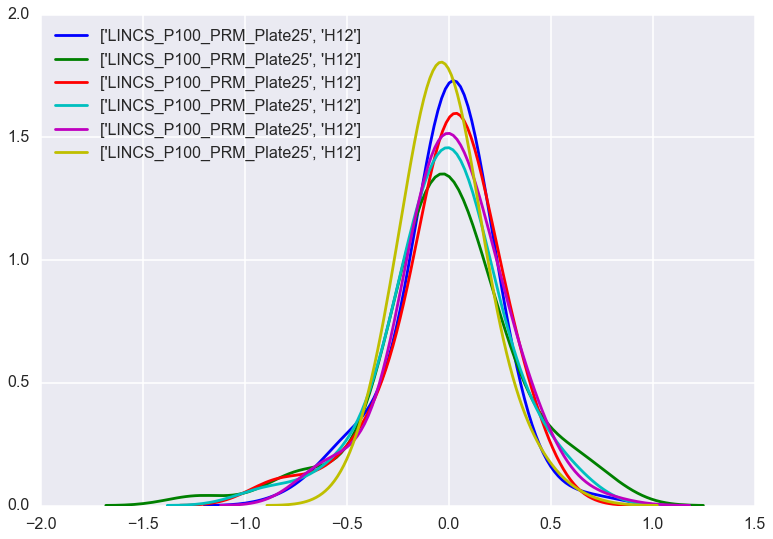

In [309]:
# Lets visualise LINCS_P100_DIA_Plate27, LINCS_P100_DIA_Plate27 for 'PS-1145' drug

sns.kdeplot(lincs_p100['LINCS_P100_DIA_Plate27']['H11', 'PS-1145'].as_matrix(), label=[f,col[0]], bw=.15);
sns.kdeplot(lincs_p100['LINCS_P100_DIA_Plate27']['H12', 'PS-1145'].as_matrix(), label=[f,col[0]], bw=.15);
sns.kdeplot(lincs_p100['LINCS_P100_DIA_Plate27']['H10', 'PS-1145'].as_matrix(), label=[f,col[0]], bw=.15);
sns.kdeplot(lincs_p100['LINCS_P100_DIA_Plate34']['H11', 'PS-1145'].as_matrix(), label=[f,col[0]], bw=.15);
sns.kdeplot(lincs_p100['LINCS_P100_DIA_Plate34']['H12', 'PS-1145'].as_matrix(), label=[f,col[0]], bw=.15);
sns.kdeplot(lincs_p100['LINCS_P100_DIA_Plate34']['H10', 'PS-1145'].as_matrix(), label=[f,col[0]], bw=.15);

In [328]:
trial_plate_name = []
columns_to_drop = {}
for f in keys:
    columns_to_drop[f] = []
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[1]):
                trial_plate_name.append(f)
                print f, col, sum(lincs_p100[f][col].isnull())
                columns_to_drop[f].append(col)
trial_plate_name = list(set(trial_plate_name))


LINCS_P100_DIA_Plate27 ('B10', 'Nilotinib') 5
LINCS_P100_DIA_Plate27 ('B11', 'Nilotinib') 2
LINCS_P100_DIA_Plate27 ('B12', 'Nilotinib') 1
LINCS_P100_PRM_Plate32 ('B12', 'Nilotinib') 1
LINCS_P100_DIA_Plate34 ('B10', 'Nilotinib') 2
LINCS_P100_DIA_Plate34 ('B11', 'Nilotinib') 1
LINCS_P100_DIA_Plate34 ('B12', 'Nilotinib') 2
LINCS_P100_DIA_Plate38 ('E12', 'Nilotinib') 1


plotting--linestyle-- is motivated from
https://stackoverflow.com/questions/7799156/can-i-cycle-through-line-styles-in-matplotlib

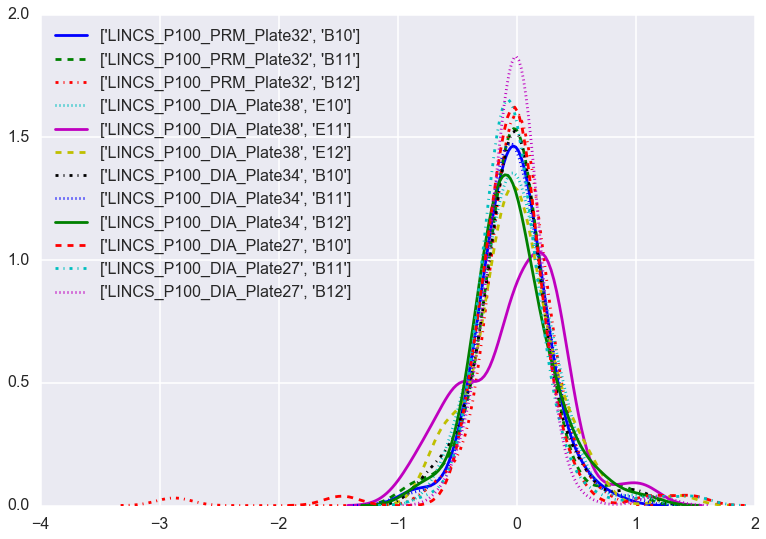

In [326]:
from cycler import cycler
from itertools import cycle
lines = ["-","--","-.",":"]
linecycler = cycle(lines)
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')



for f in trial_plate_name:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[1]):
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

Columns to neglect due to either skewed or bimodal districution:
1. LINCS_P100_DIA_Plate38 ('E12', 'Nilotinib') : Only one replicate has missing value
2. LINCS_P100_PRM_Plate32 ('B12', 'Nilotinib') : Only one replicate has missing value 
3. LINCS_P100_DIA_Plate27 ('B10', 'Nilotinib') : Due to skewed distribution 

LINCS_P100_DIA_Plate27 ('B10', 'Nilotinib') conatins 5 missing values -> Neglected -> skewed
LINCS_P100_DIA_Plate27 ('B11', 'Nilotinib') conatins 2 missing values -> Kept
LINCS_P100_DIA_Plate27 ('B12', 'Nilotinib') conatins 1 missing values -> kept


LINCS_P100_PRM_Plate32 ('B12', 'Nilotinib') conatins 1 missing values -> Neglected -> Skwed
LINCS_P100_PRM_Plate32 ('B12', 'Nilotinib') conatins 0 missing values -> kept 
LINCS_P100_PRM_Plate32 ('B12', 'Nilotinib') conatins 0 missing values -> kept 

LINCS_P100_DIA_Plate34 ('B10', 'Nilotinib') conatins 2 missing values -> Kept
LINCS_P100_DIA_Plate34 ('B11', 'Nilotinib') conatins 1 missing values -> kept
LINCS_P100_DIA_Plate34 ('B12', 'Nilotinib') conatins 2 missing values -> kept

LINCS_P100_DIA_Plate38 ('E10', 'Nilotinib') conatins 0 missing values -> kept 
LINCS_P100_DIA_Plate38 ('E12', 'Nilotinib') conatins 1 missing values -> Neglected -> skewed
LINCS_P100_DIA_Plate38 ('E11', 'Nilotinib') conatins 0 missing values -> Neglected -> skewed


In [329]:
print columns_to_drop



{'LINCS_P100_DIA_Plate53': [], 'LINCS_P100_DIA_Plate61': [], 'LINCS_P100_DIA_Plate60': [], 'LINCS_P100_DIA_Plate48': [], 'LINCS_P100_DIA_Plate47': [], 'LINCS_P100_DIA_Plate46': [], 'LINCS_P100_DIA_Plate23': [], 'LINCS_P100_DIA_Plate22': [], 'LINCS_P100_DIA_Plate43': [], 'LINCS_P100_PRM_Plate29_03H': [], 'LINCS_P100_DIA_Plate41': [], 'LINCS_P100_DIA_Plate40': [], 'LINCS_P100_DIA_Plate15': [], 'LINCS_P100_DIA_Plate16': [], 'LINCS_P100_DIA_Plate44': [], 'LINCS_P100_DIA_Plate18': [], 'LINCS_P100_DIA_Plate19': [], 'LINCS_P100_DIA_Plate24': [], 'LINCS_P100_DIA_Plate27': [('B10', 'Nilotinib'), ('B11', 'Nilotinib'), ('B12', 'Nilotinib')], 'LINCS_P100_PRM_Plate18': [], 'LINCS_P100_PRM_Plate31': [], 'LINCS_P100_PRM_Plate35': [], 'LINCS_P100_DIA_Plate42': [], 'LINCS_P100_DIA_Plate51': [], 'LINCS_P100_DIA_Plate52': [], 'LINCS_P100_DIA_Plate17': [], 'LINCS_P100_PRM_Plate32': [('B12', 'Nilotinib')], 'LINCS_P100_DIA_Plate58': [], 'LINCS_P100_DIA_Plate33': [], 'LINCS_P100_DIA_Plate30': [], 'LINCS_P100

In [331]:
#working for other drugs
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[0]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))


LINCS_P100_DIA_Plate27 ('H12', 'PS-1145') 6
LINCS_P100_DIA_Plate34 ('H12', 'PS-1145') 1


In [332]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[2]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('E12', 'BMS-345541') 1
LINCS_P100_PRM_Plate29_24H ('E11', 'BMS-345541') 1
LINCS_P100_PRM_Plate32 ('E10', 'BMS-345541') 1
LINCS_P100_DIA_Plate33 ('E11', 'BMS-345541') 2
LINCS_P100_DIA_Plate34 ('E10', 'BMS-345541') 1
LINCS_P100_DIA_Plate34 ('E12', 'BMS-345541') 1


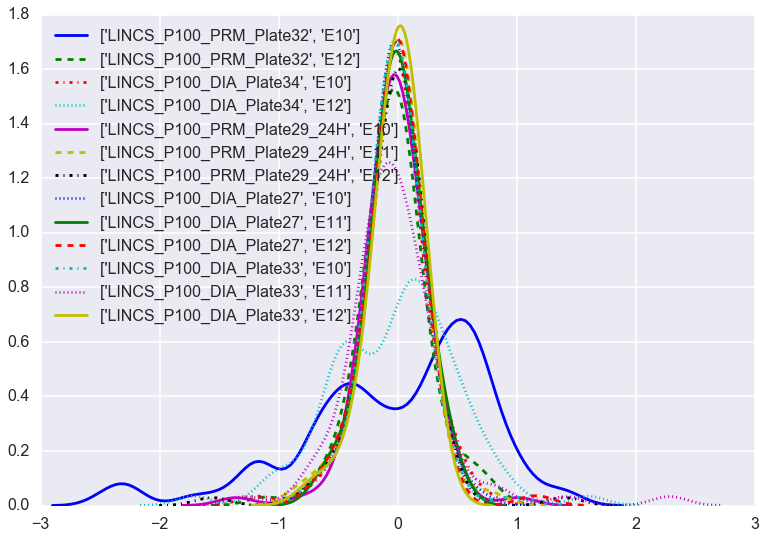

In [347]:
for f in trial_plate_name:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[2]):
#             print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

In [1]:
drugs_used[2]

NameError: name 'drugs_used' is not defined

Columns to neglect:


LINCS_P100_DIA_Plate27 ('E10', 'BMS-345541') contains 0 missing values -> kept
LINCS_P100_DIA_Plate27 ('E11', 'BMS-345541') contains 0 missing values -> kept
LINCS_P100_DIA_Plate27 ('E12', 'BMS-345541') contains 1 missing values -> kept

LINCS_P100_PRM_Plate29_24H ('E10', 'BMS-345541') contains 0 missing values -> kept
LINCS_P100_PRM_Plate29_24H ('E11', 'BMS-345541') contains 1 missing values -> kept 
LINCS_P100_PRM_Plate29_24H ('E12', 'BMS-345541') contains 0 missing values -> kept

LINCS_P100_PRM_Plate32 ('E10', 'BMS-345541')     contains 1 missing values -> neglect -> multimodal distribution 
LINCS_P100_PRM_Plate32 ('E12', 'BMS-345541')     contains 1 missing values -> kept 

LINCS_P100_DIA_Plate33 ('E10', 'BMS-345541') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate33 ('E11', 'BMS-345541') contains 2 msiing values -> neglect -> multimodal distribution 
LINCS_P100_DIA_Plate33 ('E12', 'BMS-345541') contains 0 msiing values -> kept


LINCS_P100_DIA_Plate34 ('E10', 'BMS-345541')     contains 1 missing values -> kept
LINCS_P100_DIA_Plate34 ('E12', 'BMS-345541')     contains 1 missing values -> neglect ->  multimodal distribution  


In [348]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[3]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('A7', 'CC-401') 1
LINCS_P100_DIA_Plate27 ('A8', 'CC-401') 3
LINCS_P100_DIA_Plate27 ('A9', 'CC-401') 1
LINCS_P100_DIA_Plate34 ('A7', 'CC-401') 10


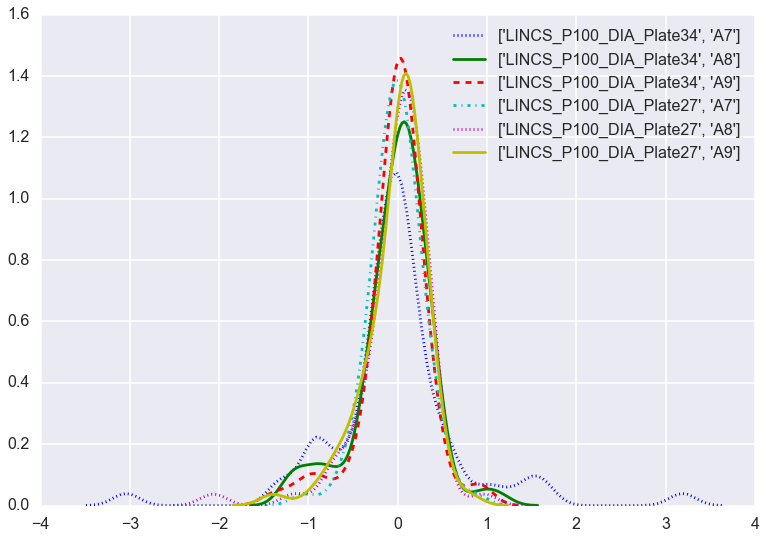

In [357]:
for f in trial_plate_name:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[3]):
#             print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

Columns to neglect due to either skewed or bimodal districution:
1. aa

LINCS_P100_DIA_Plate34 ('A7', 'CC-401') contains 10 msiing values -> neglect
LINCS_P100_DIA_Plate34 ('A8', 'CC-401') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate34 ('A9', 'CC-401') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate27 ('A7', 'CC-401') contains 1 msiing values -> kept
LINCS_P100_DIA_Plate27 ('A8', 'CC-401') contains 3 msiing values -> neglect
LINCS_P100_DIA_Plate27 ('A9', 'CC-401') contains 1 msiing values -> kept


In [360]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[4]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('C1', 'PD0325901') 2
LINCS_P100_PRM_Plate32 ('C1', 'PD0325901') 4


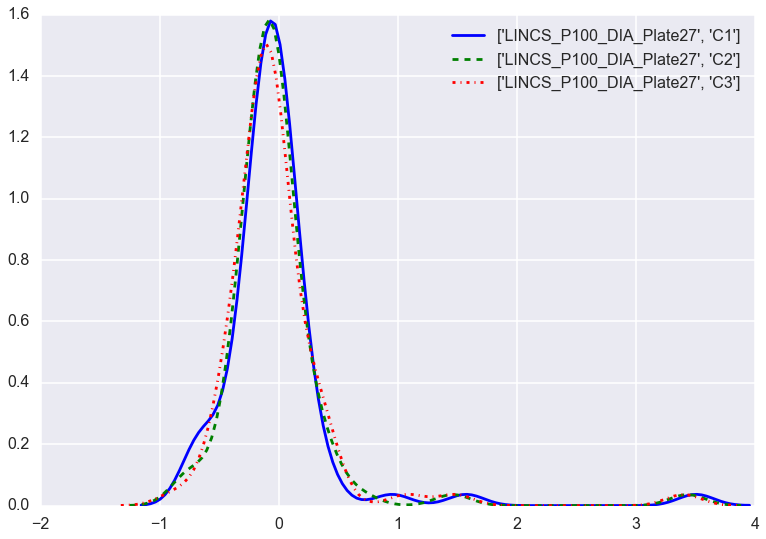

In [364]:
for f in trial_plate_name[1:]:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[4]):
#             print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

LINCS_P100_PRM_Plate32 ('C1', 'PD0325901') contains 4 msiing values -> Neglect
LINCS_P100_PRM_Plate32 ('C2', 'PD0325901') contains 0 msiing values -> kept
LINCS_P100_PRM_Plate32 ('C3', 'PD0325901') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate27 ('C1', 'PD0325901') contains 2 msiing values -> Neglect
LINCS_P100_DIA_Plate27 ('C2', 'PD0325901') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate27 ('C3', 'PD0325901') contains 0 msiing values -> kept


In [365]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[5]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('E3', 'vemurafenib') 2
LINCS_P100_DIA_Plate33 ('E2', 'vemurafenib') 1
LINCS_P100_DIA_Plate33 ('E3', 'vemurafenib') 1


LINCS_P100_DIA_Plate33 ('E1', 'vemurafenib') contains 0 msiing values ->
LINCS_P100_DIA_Plate33 ('E2', 'vemurafenib') contains 1 msiing values ->
LINCS_P100_DIA_Plate33 ('E3', 'vemurafenib') contains 1 msiing values ->
LINCS_P100_DIA_Plate27 ('E1', 'vemurafenib') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('E2', 'vemurafenib') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('E3', 'vemurafenib') contains 2 msiing values ->


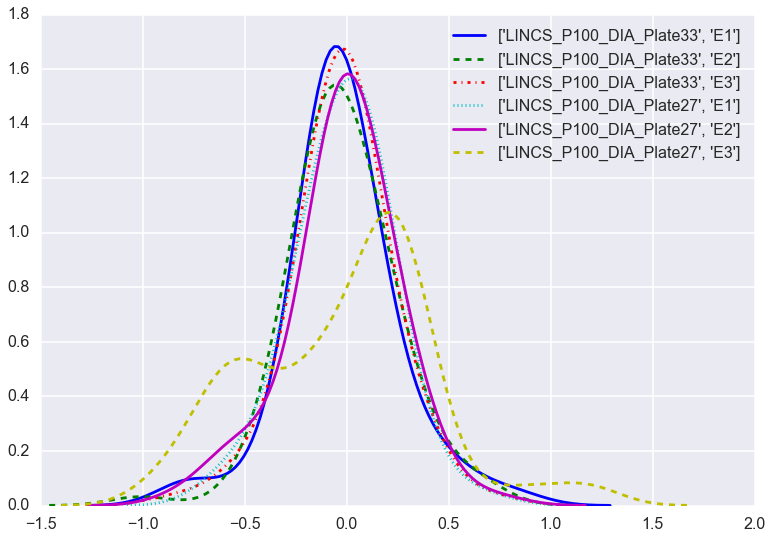

In [375]:
for f in trial_plate_name:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[5]):
            print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

LINCS_P100_DIA_Plate33 ('E1', 'vemurafenib') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate33 ('E2', 'vemurafenib') contains 1 msiing values -> kept
LINCS_P100_DIA_Plate33 ('E3', 'vemurafenib') contains 1 msiing values -> kept
LINCS_P100_DIA_Plate27 ('E1', 'vemurafenib') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate27 ('E2', 'vemurafenib') contains 0 msiing values -> kept
LINCS_P100_DIA_Plate27 ('E3', 'vemurafenib') contains 2 msiing values -> neglect


In [378]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[6]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('D7', 'losmapimod') 1
LINCS_P100_DIA_Plate39 ('G1', 'losmapimod') 1
LINCS_P100_DIA_Plate39 ('G2', 'losmapimod') 1
LINCS_P100_DIA_Plate33 ('D7', 'losmapimod') 1
LINCS_P100_DIA_Plate34 ('D8', 'losmapimod') 1


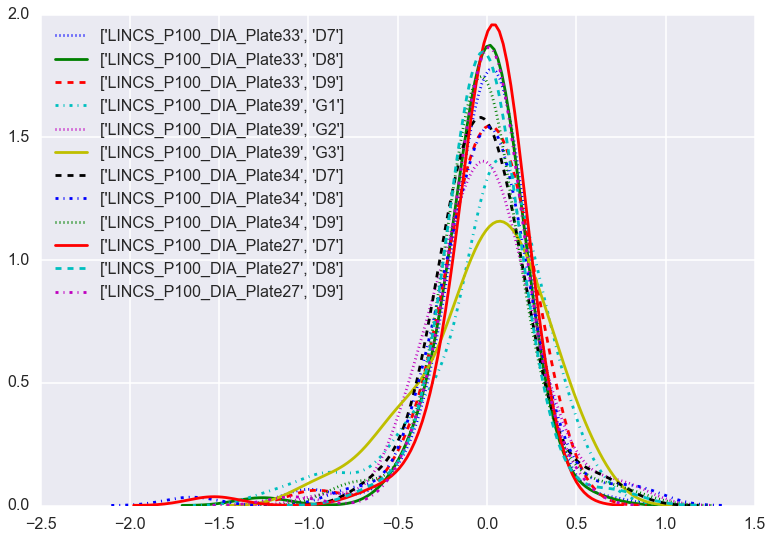

In [388]:
for f in trial_plate_name:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[6]):
#             print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

In [ ]:
LINCS_P100_DIA_Plate33 ('D7', 'losmapimod') contains 1 msiing values ->  
LINCS_P100_DIA_Plate33 ('D8', 'losmapimod') contains 0 msiing values ->
LINCS_P100_DIA_Plate33 ('D9', 'losmapimod') contains 0 msiing values ->
LINCS_P100_DIA_Plate39 ('G1', 'losmapimod') contains 1 msiing values ->
LINCS_P100_DIA_Plate39 ('G2', 'losmapimod') contains 1 msiing values ->
LINCS_P100_DIA_Plate39 ('G3', 'losmapimod') contains 0 msiing values -> neglect
LINCS_P100_DIA_Plate34 ('D7', 'losmapimod') contains 0 msiing values ->
LINCS_P100_DIA_Plate34 ('D8', 'losmapimod') contains 1 msiing values -> neglect
LINCS_P100_DIA_Plate34 ('D9', 'losmapimod') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('D7', 'losmapimod') contains 1 msiing values -> neglect
LINCS_P100_DIA_Plate27 ('D8', 'losmapimod') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('D9', 'losmapimod') contains 0 msiing values ->

In [389]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[7]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('H6', 'vorinostat') 3
LINCS_P100_DIA_Plate23 ('H4', 'vorinostat') 2
LINCS_P100_DIA_Plate23 ('H5', 'vorinostat') 2
LINCS_P100_DIA_Plate23 ('H6', 'vorinostat') 2
LINCS_P100_DIA_Plate24 ('H5', 'vorinostat') 1
LINCS_P100_DIA_Plate24 ('H6', 'vorinostat') 1
LINCS_P100_DIA_Plate16 ('H5', 'vorinostat') 1
LINCS_P100_PRM_Plate35 ('D11', 'vorinostat') 2
LINCS_P100_DIA_Plate39 ('H5', 'vorinostat') 1
LINCS_P100_DIA_Plate30 ('H4', 'vorinostat') 1
LINCS_P100_DIA_Plate30 ('H5', 'vorinostat') 1
LINCS_P100_DIA_Plate34 ('H6', 'vorinostat') 1


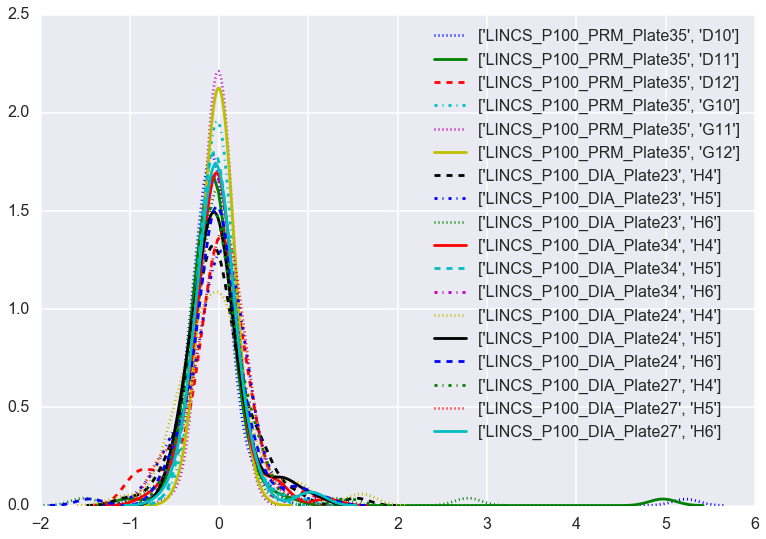

In [403]:
for f in trial_plate_name[3:]:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[7]):
#             print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

In [ ]:
LINCS_P100_DIA_Plate16 ('H4', 'vorinostat') contains 0 msiing values -> neglect
LINCS_P100_DIA_Plate16 ('H5', 'vorinostat') contains 1 msiing values ->
LINCS_P100_DIA_Plate16 ('H6', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate30 ('H4', 'vorinostat') contains 1 msiing values -> 
LINCS_P100_DIA_Plate30 ('H5', 'vorinostat') contains 1 msiing values ->
LINCS_P100_DIA_Plate30 ('H6', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate39 ('H4', 'vorinostat') contains 0 msiing values -> neglect
LINCS_P100_DIA_Plate39 ('H5', 'vorinostat') contains 1 msiing values ->
LINCS_P100_DIA_Plate39 ('H6', 'vorinostat') contains 0 msiing values ->
LINCS_P100_PRM_Plate35 ('D10', 'vorinostat') contains 0 msiing values -> kept_suspecious
LINCS_P100_PRM_Plate35 ('D11', 'vorinostat') contains 2 msiing values -> kept_suspecious
LINCS_P100_PRM_Plate35 ('D12', 'vorinostat') contains 0 msiing values -> kept_suspecious
LINCS_P100_PRM_Plate35 ('G10', 'vorinostat') contains 0 msiing values ->
LINCS_P100_PRM_Plate35 ('G11', 'vorinostat') contains 0 msiing values ->
LINCS_P100_PRM_Plate35 ('G12', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate23 ('H4', 'vorinostat') contains 2 msiing values ->
LINCS_P100_DIA_Plate23 ('H5', 'vorinostat') contains 2 msiing values ->
LINCS_P100_DIA_Plate23 ('H6', 'vorinostat') contains 2 msiing values -> neglect
LINCS_P100_DIA_Plate34 ('H4', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate34 ('H5', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate34 ('H6', 'vorinostat') contains 1 msiing values ->
LINCS_P100_DIA_Plate24 ('H4', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate24 ('H5', 'vorinostat') contains 1 msiing values ->
LINCS_P100_DIA_Plate24 ('H6', 'vorinostat') contains 1 msiing values ->
LINCS_P100_DIA_Plate27 ('H4', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('H5', 'vorinostat') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('H6', 'vorinostat') contains 3 msiing values ->


In [404]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[8]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('D12', 'AR A014418') 1
LINCS_P100_DIA_Plate39 ('D4', 'AR A014418') 1
LINCS_P100_DIA_Plate33 ('D12', 'AR A014418') 1
LINCS_P100_DIA_Plate34 ('D11', 'AR A014418') 1
LINCS_P100_DIA_Plate38 ('H12', 'AR A014418') 2


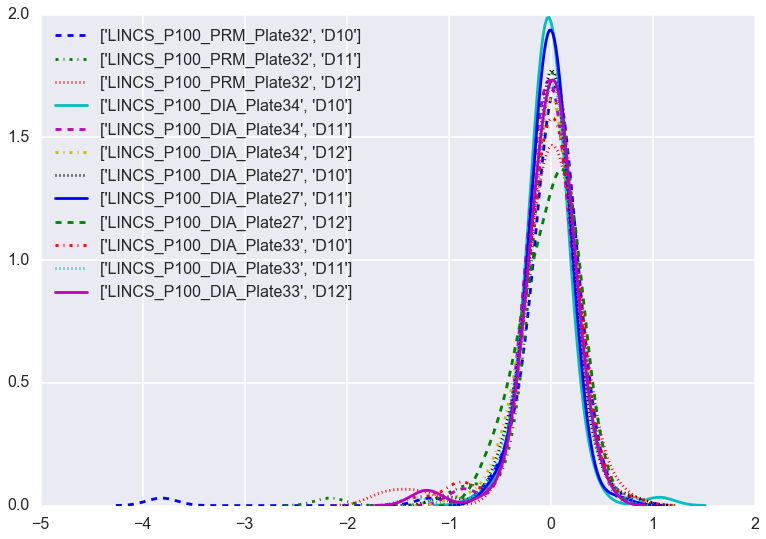

In [422]:
for f in trial_plate_name:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[8]):
#             print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

In [ ]:
LINCS_P100_DIA_Plate33 ('D10', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate33 ('D11', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate33 ('D12', 'AR A014418') contains 1 msiing values ->
LINCS_P100_DIA_Plate38 ('H10', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate38 ('H11', 'AR A014418') contains 0 msiing values -> 
LINCS_P100_DIA_Plate38 ('H12', 'AR A014418') contains 2 msiing values -> neglect
LINCS_P100_DIA_Plate39 ('D4', 'AR A014418') contains 1 msiing values ->
LINCS_P100_DIA_Plate39 ('D5', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate39 ('D6', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate34 ('D10', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate34 ('D11', 'AR A014418') contains 1 msiing values ->
LINCS_P100_DIA_Plate34 ('D12', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('D10', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('D11', 'AR A014418') contains 0 msiing values ->
LINCS_P100_DIA_Plate27 ('D12', 'AR A014418') contains 1 msiing values -> neglect


In [420]:
trial_plate_name = []
for f in keys:
    for col in lincs_p100[f].columns[1:]:
        if (sum(lincs_p100[f][col].isnull()) > 0):
            if (col[1] == drugs_used[9]):
                trial_plate_name.append(f)
                columns_to_drop[f].append(col)
                print f, col, sum(lincs_p100[f][col].isnull())
trial_plate_name = list(set(trial_plate_name))

LINCS_P100_DIA_Plate27 ('F10', 'IPI145') 1
LINCS_P100_DIA_Plate27 ('F11', 'IPI145') 2
LINCS_P100_DIA_Plate27 ('F12', 'IPI145') 1
LINCS_P100_PRM_Plate32 ('F10', 'IPI145') 1
LINCS_P100_DIA_Plate33 ('F11', 'IPI145') 2
LINCS_P100_DIA_Plate33 ('F12', 'IPI145') 1
LINCS_P100_DIA_Plate34 ('F12', 'IPI145') 1


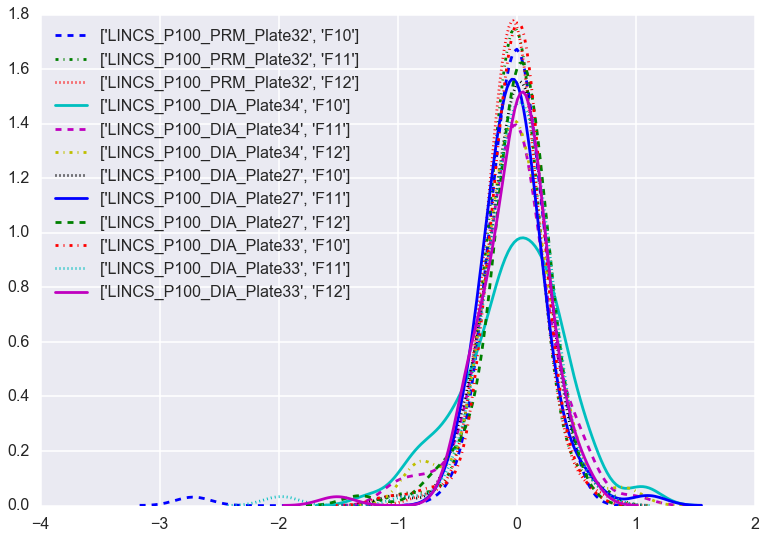

In [421]:
for f in trial_plate_name:
    for col in lincs_p100[f].columns[1:]:
        if (col[1] == drugs_used[9]):
#             print f, col, "contains", sum(lincs_p100[f][col].isnull()), "msiing values ->"
            if 1:
#                 (sum(lincs_p100[f][col].isnull()) > 0):
                sns.kdeplot(lincs_p100[f][col].as_matrix(), label=[f,col[0]], bw=.15, linestyle=next(linecycler));
                

In [ ]:
entropy()